<a href="https://www.kaggle.com/code/septianbagussantoso/tugas-machine-learning-ds-wpv2-kelompok-8?scriptVersionId=247288651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.txt
/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

2025-06-25 10:12:22.887356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750846343.134718      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750846343.204205      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# LOAD DATASET
path = "/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv"
df = pd.read_csv(path)

In [4]:
# PREPROCESSING
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

In [5]:
# SPLIT DATA
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

In [6]:
# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
# MODEL KLASIK
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
    "Naïve Bayes": BernoulliNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(loss='log_loss', max_iter=1000),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

In [8]:
# EVALUASI KLASIK
all_metrics_val = []
all_metrics_test = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_val_prob = model.predict_proba(X_val_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    val_metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1-Score": f1_score(y_val, y_val_pred),
        "Loss": log_loss(y_val, y_val_prob) if y_val_prob is not None else np.nan,
        "AUC": roc_auc_score(y_val, y_val_prob) if y_val_prob is not None else np.nan
    }
    test_metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-Score": f1_score(y_test, y_test_pred),
        "Loss": log_loss(y_test, y_test_prob) if y_test_prob is not None else np.nan,
        "AUC": roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else np.nan
    }

    all_metrics_val.append(val_metrics)
    all_metrics_test.append(test_metrics)

In [9]:
# MODEL CNN
def create_cnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.001)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(X_train_scaled.shape[1])
history = cnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val_scaled, y_val), verbose=0)

cnn_val_prob = cnn_model.predict(X_val_scaled).flatten()
cnn_test_prob = cnn_model.predict(X_test_scaled).flatten()
cnn_val_pred = (cnn_val_prob > 0.5).astype(int)
cnn_test_pred = (cnn_test_prob > 0.5).astype(int)

cnn_val_metrics = {
    "Model": "CNN",
    "Accuracy": accuracy_score(y_val, cnn_val_pred),
    "Precision": precision_score(y_val, cnn_val_pred),
    "Recall": recall_score(y_val, cnn_val_pred),
    "F1-Score": f1_score(y_val, cnn_val_pred),
    "Loss": log_loss(y_val, cnn_val_prob),
    "AUC": roc_auc_score(y_val, cnn_val_prob)
}
cnn_test_metrics = {
    "Model": "CNN",
    "Accuracy": accuracy_score(y_test, cnn_test_pred),
    "Precision": precision_score(y_test, cnn_test_pred),
    "Recall": recall_score(y_test, cnn_test_pred),
    "F1-Score": f1_score(y_test, cnn_test_pred),
    "Loss": log_loss(y_test, cnn_test_prob),
    "AUC": roc_auc_score(y_test, cnn_test_prob)
}

all_metrics_val.append(cnn_val_metrics)
all_metrics_test.append(cnn_test_metrics)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-25 10:12:56.389066: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
# KONVERSI HASIL KE DATAFRAME
val_df = pd.DataFrame(all_metrics_val).sort_values("Accuracy", ascending=False)
test_df = pd.DataFrame(all_metrics_test).sort_values("Accuracy", ascending=False)

In [11]:
# CETAK HASIL TABEL
print("\n\U0001F4CB Training Set Metrics:")
print(val_df.round(4))
print("\n\U0001F4CB Testing Set Metrics:")
print(test_df.round(4))


📋 Training Set Metrics:
                           Model  Accuracy  Precision  Recall  F1-Score  \
7      Extreme Gradient Boosting    0.9746     0.9692  0.9844    0.9767   
2                  Random Forest    0.9723     0.9681  0.9812    0.9746   
10          Neural Network (MLP)    0.9678     0.9621  0.9791    0.9705   
11                           CNN    0.9644     0.9480  0.9885    0.9678   
1                  Decision Tree    0.9638     0.9657  0.9677    0.9667   
3         Support Vector Machine    0.9497     0.9394  0.9698    0.9543   
6                       AdaBoost    0.9356     0.9238  0.9604    0.9417   
5            K-Nearest Neighbors    0.9293     0.9281  0.9426    0.9353   
0            Logistic Regression    0.9243     0.9188  0.9437    0.9311   
8   Linear Discriminant Analysis    0.9237     0.9145  0.9479    0.9309   
4                    Naïve Bayes    0.9231     0.9127  0.9489    0.9305   
9    Stochastic Gradient Descent    0.9192     0.9080  0.9468    0.9270   


/tmp/ipykernel_13/395039939.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


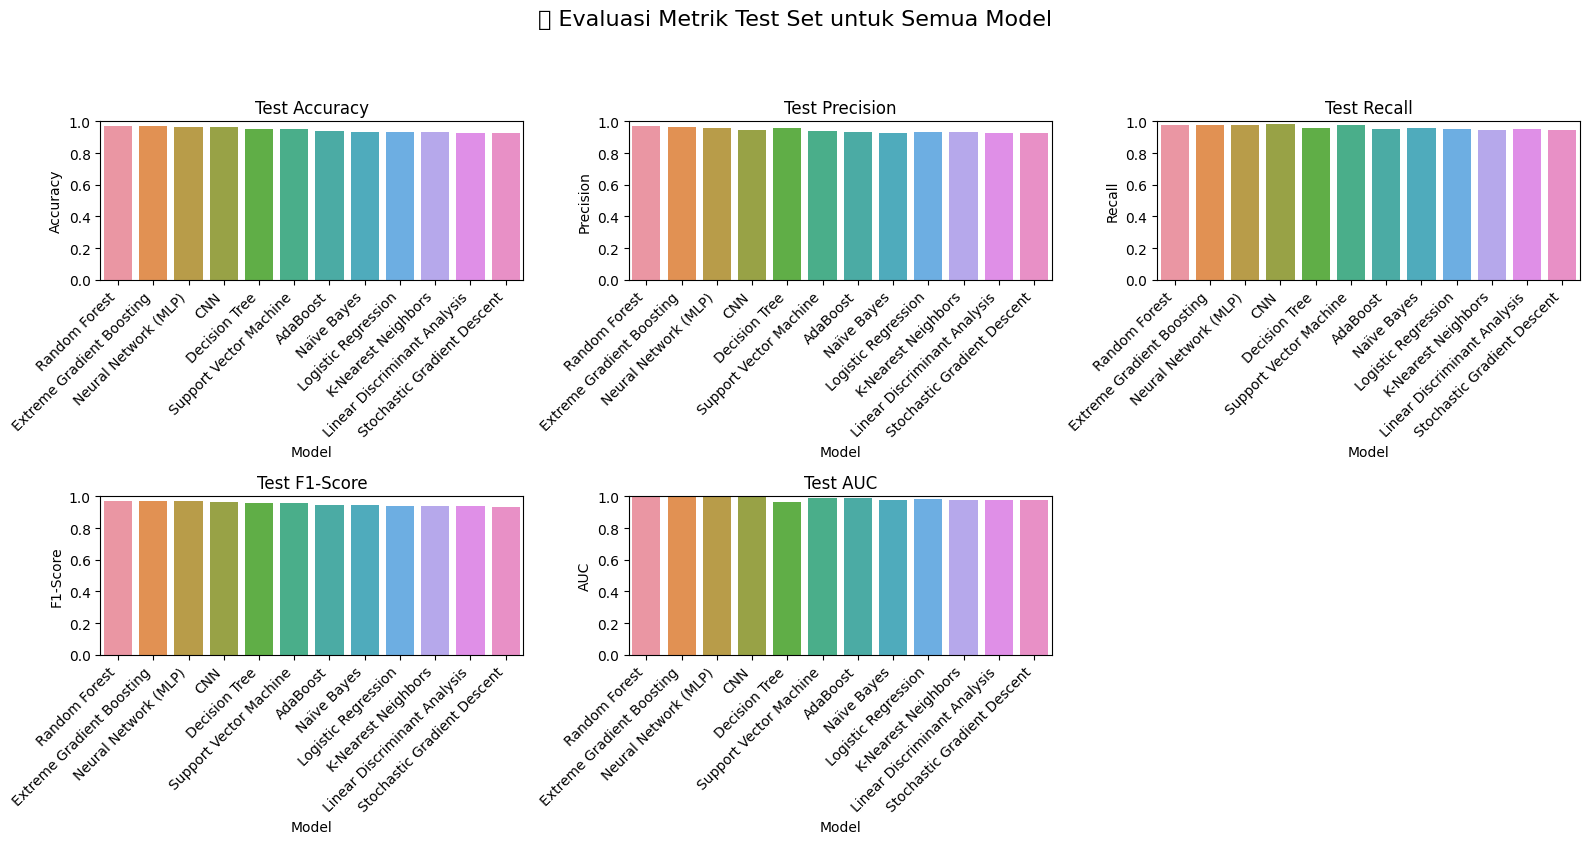

In [12]:
# VISUALISASI BAR CHART UNTUK TEST SET
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=test_df, x="Model", y=metric)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Test {metric}")
    plt.ylim(0, 1)
    plt.tight_layout()

plt.suptitle("\U0001F4CA Evaluasi Metrik Test Set untuk Semua Model", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

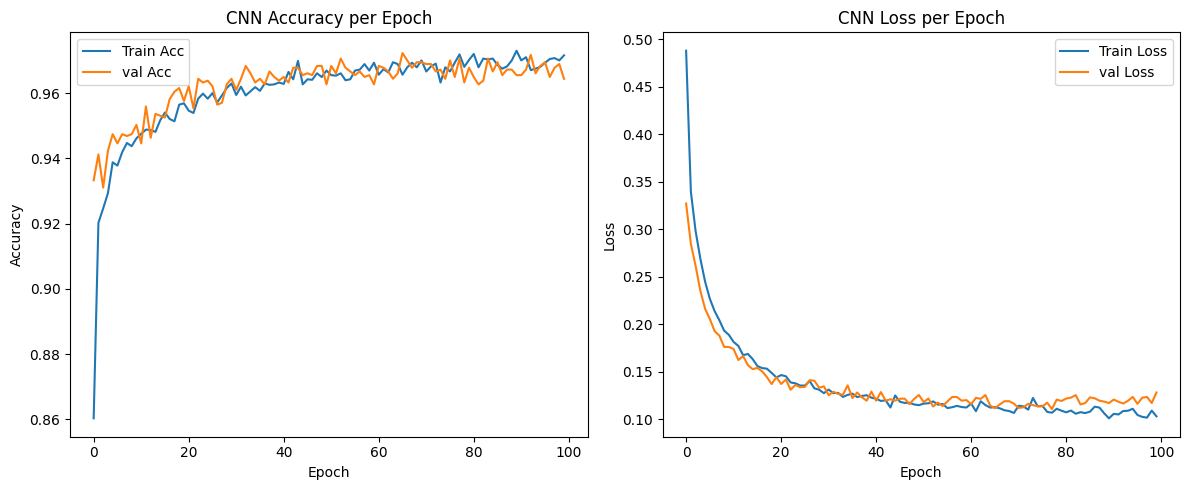

In [13]:
# GRAFIK HISTORI TRAINING CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='val Acc')
plt.title('CNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.title('CNN Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
print("Ukuran data:", df.shape)
print("\nInfo data:")
print(df.info())
print("\nBeberapa baris awal:")
print(df.head())
print("\nStatistik ringkas:")
print(df.describe())
print("\nDistribusi label:")
print(df['class'].value_counts())

Ukuran data: (11054, 32)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-nu

📊 Evaluasi 5-Fold Cross-Validation (Model Klasik):
Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Support Vector Machine...
Evaluating Naïve Bayes...
Evaluating K-Nearest Neighbors...
Evaluating AdaBoost...
Evaluating Extreme Gradient Boosting...
Evaluating Linear Discriminant Analysis...
Evaluating Stochastic Gradient Descent...
Evaluating Neural Network (MLP)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

📋 Hasil Evaluasi Model (CV + CNN):
                           Model  Accuracy  Precision  Recall  F1-Score  \
0      Extreme Gradient Boosting    0.9712     0.9691  0.9795    0.9743   
1                  Random Forest    0.9707     0.9687  0.9790    0.9738   
2           Neural Network (MLP)    0.9693     0.9672  0.9781    0.9726   
3                  Decision Tree    0.9615     0.9637  0.9672    0.9655   
4         Support Vector Machine    0.9513     0.9457  0.9682    0.9568   
5            K-Nearest Neighbors    0.9398     0.9438  0.9484    0.9460   
6                       AdaBoost    0.9361     0.9328  0.9540    0.9433   
7            Logistic Regression    0.9271     0.9264  0.9441    0.9352   
8   Linear Discriminant Analysis    0.9217     0.9176  0.9443    0.9308   
9    Stochastic Gradient Descent    0.9217     0.9242  0.9362    0.9301   
10                  

/tmp/ipykernel_13/2424546092.py:139: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


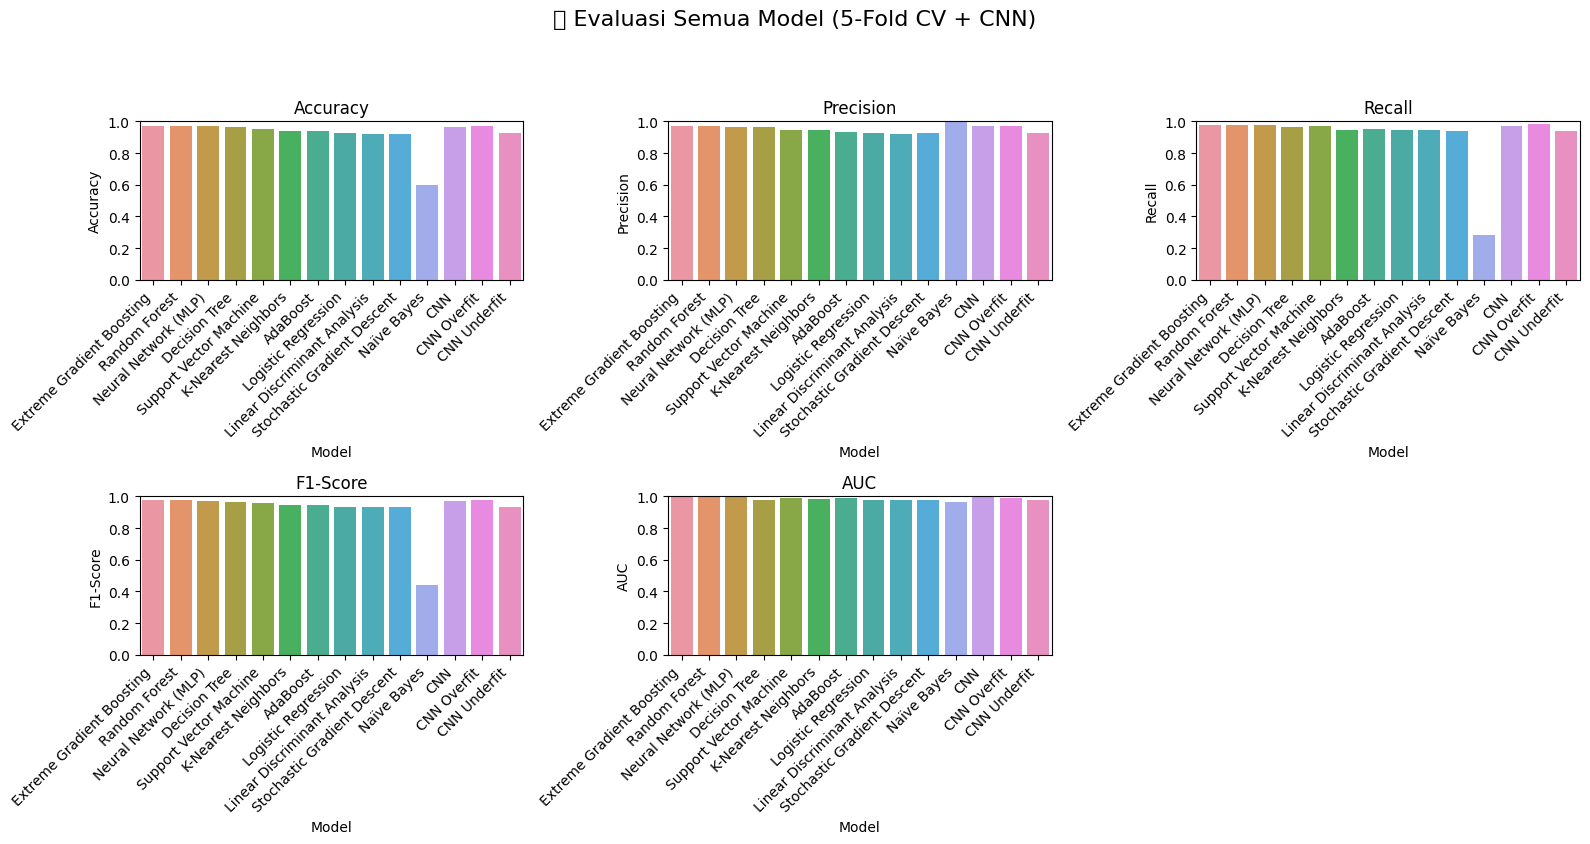

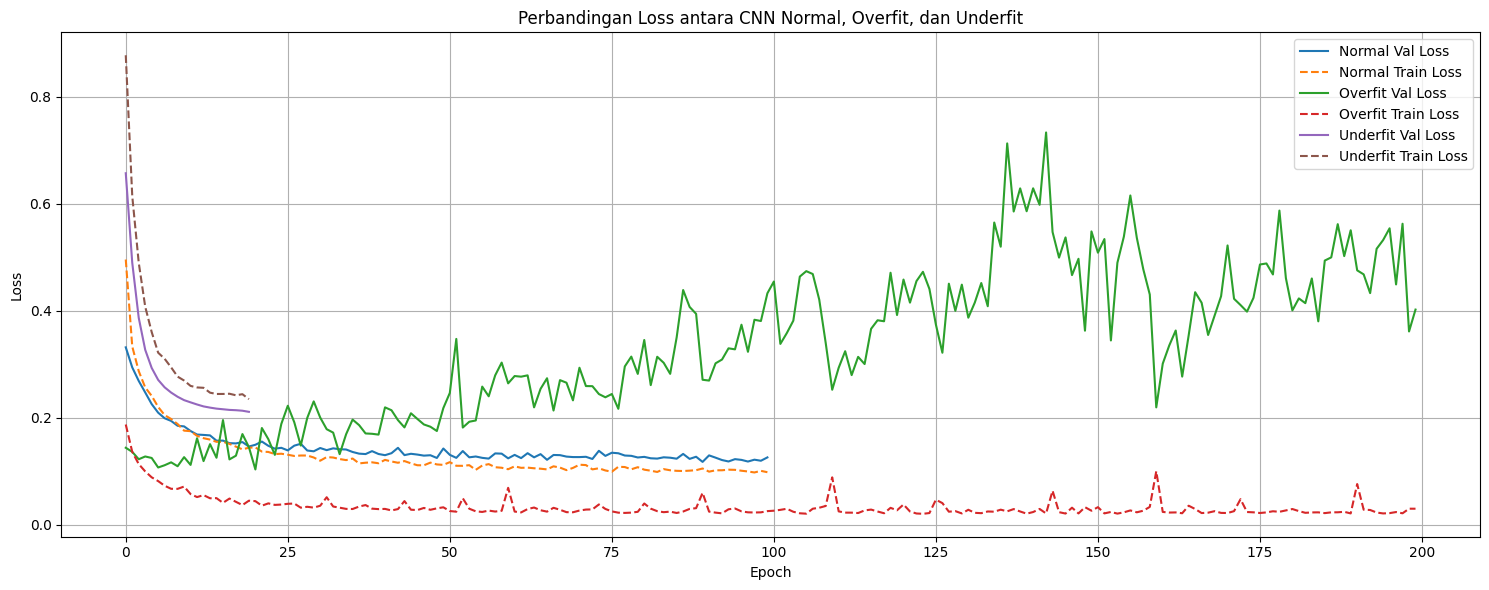

Ukuran data: (11054, 32)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-nu

In [15]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# === LOAD DATASET ===
path = "/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv"
df = pd.read_csv(path)

# === PREPROCESSING ===
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

# === SCALING ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === CROSS VALIDATION UNTUK MODEL KLASIK ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(loss='log_loss', max_iter=1000),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

print("\U0001F4CA Evaluasi 5-Fold Cross-Validation (Model Klasik):")
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = cross_val_predict(model, X_scaled, y, cv=skf)
    if hasattr(model, "predict_proba"):
        y_proba = cross_val_predict(model, X_scaled, y, cv=skf, method="predict_proba")[:, 1]
    else:
        y_proba = y_pred

    cv_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1-Score": f1_score(y, y_pred),
        "AUC": roc_auc_score(y, y_proba),
        "Loss": 1 - accuracy_score(y, y_pred)
    })

cv_df = pd.DataFrame(cv_results).sort_values("Accuracy", ascending=False)

# === TRAIN/VAL/TEST SPLIT UNTUK CNN ===
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

# === DEFINISI VARIASI MODEL CNN ===
def build_cnn(input_shape, dropout_rate=0.3, reg_rate=0.001, hidden_units=[128, 64, 32]):
    model = Sequential()
    for i, units in enumerate(hidden_units):
        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(reg_rate)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=l2(reg_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === TRAIN CNN NORMAL ===
cnn_normal = build_cnn(X_train.shape[1])
hist_normal = cnn_normal.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

# === TRAIN CNN OVERFITTING ===
cnn_overfit = build_cnn(X_train.shape[1], dropout_rate=0.05, reg_rate=0.0, hidden_units=[512, 256, 128])
hist_overfit = cnn_overfit.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=8, verbose=0)

# === TRAIN CNN UNDERFITTING ===
cnn_underfit = build_cnn(X_train.shape[1], dropout_rate=0.5, reg_rate=0.01, hidden_units=[16])
hist_underfit = cnn_underfit.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, verbose=0)

# === EVALUASI CNN ===
def eval_model(model, X_val, y_val):
    y_prob = model.predict(X_val).flatten()
    y_pred = (y_prob > 0.5).astype(int)
    return {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1-Score": f1_score(y_val, y_pred),
        "AUC": roc_auc_score(y_val, y_prob),
        "Loss": log_loss(y_val, y_prob)
    }

cnn_results = [
    {"Model": "CNN", **eval_model(cnn_normal, X_val, y_val)},
    {"Model": "CNN Overfit", **eval_model(cnn_overfit, X_val, y_val)},
    {"Model": "CNN Underfit", **eval_model(cnn_underfit, X_val, y_val)}
]

cv_df = pd.concat([cv_df, pd.DataFrame(cnn_results)], ignore_index=True)

# === TAMPILKAN HASIL ===
print("\n\U0001F4CB Hasil Evaluasi Model (CV + CNN):")
print(cv_df.round(4))

# === VISUALISASI METRIK KLASIK DAN CNN ===
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=cv_df, x="Model", y=metric)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{metric}")
    plt.ylim(0, 1)
    plt.tight_layout()
plt.suptitle("\U0001F4CA Evaluasi Semua Model (5-Fold CV + CNN)", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# === VISUALISASI TRAINING PERFORMA CNN ===
def plot_history(histories, labels):
    plt.figure(figsize=(15, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label} Val Loss')
        plt.plot(history.history['loss'], linestyle='--', label=f'{label} Train Loss')
    plt.title('Perbandingan Loss antara CNN Normal, Overfit, dan Underfit')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_history([hist_normal, hist_overfit, hist_underfit], ["Normal", "Overfit", "Underfit"])

# === INFO DATA ===
print("Ukuran data:", df.shape)
print("\nInfo data:")
print(df.info())
print("\nBeberapa baris awal:")
print(df.head())
print("\nStatistik ringkas:")
print(df.describe())
print("\nDistribusi label:")
print(df["class"].value_counts())
